# Week 1: Introduction to Machine Learning for Smart Buildings

## Exercise
Using the methods introduced in the tutorial, explore the Boston housing dataset ('wk1_boston.csv'). Identify some highly correlated features and build a multiple linear regression model:

1) Investigate what features are present and their characteristics

2) Identify and account for missing and outlier dataset. To do this, create a single function which identifies outliers and creates the outlier dataframe.

3) Identify the highly correlated features

4) Build and evaluate a multiple linear regression model. You can choose any one of the input variables to include.

5) Build and evaluate a model which includes all of the potential input features.

## 1) Investigate what features are present and their characteristics.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error

# Read in data

DATA_DIR = "data//"
df = pd.read_csv(DATA_DIR + "Week1_Boston_data.csv")
# note: we could also load the clean version of this dataset directly from sklearn.datasets.load_boston()
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


This dataset contains information collected by the US Census service concerning housing in the area of Boston, Massachussetts. 

Features:
* CRIM -> per capita crime rate by town
* ZN -> proportion of residential land zoned for lots over 25,000 sq. ft. 
* INDUS -> proportion of residential land zoned for lots over 25,000 sq. ft.
* CHAS -> Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX -> nitric oxide concentration (parts per 10 million)
* RM -> average number of rooms per dwelling
* AGE -> proportion of owner-occupied units built prior to 1940
* DIS -> weighted distances to five Boston employment centres
* RAD -> index of accessibility to radial highways
* TAX -> full-value property-tax rate per $10,000
* PTRATIO -> pupil-teacher ratio by town
* B -> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT -> % lower status of the population
* MV -> Median value of owner-occupied homes in $1000s

For this dataset, the Median value `MV` will be our target feature (what we are trying to predict).

/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/GenDataSci/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,505.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000
mean,3.613524,11.363636,11.152079,0.069170,0.554695,6.285739,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.674198,22.532806
std,8.601545,23.322453,6.858508,0.253994,0.115878,0.702874,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.132284,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,7.010000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.380000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


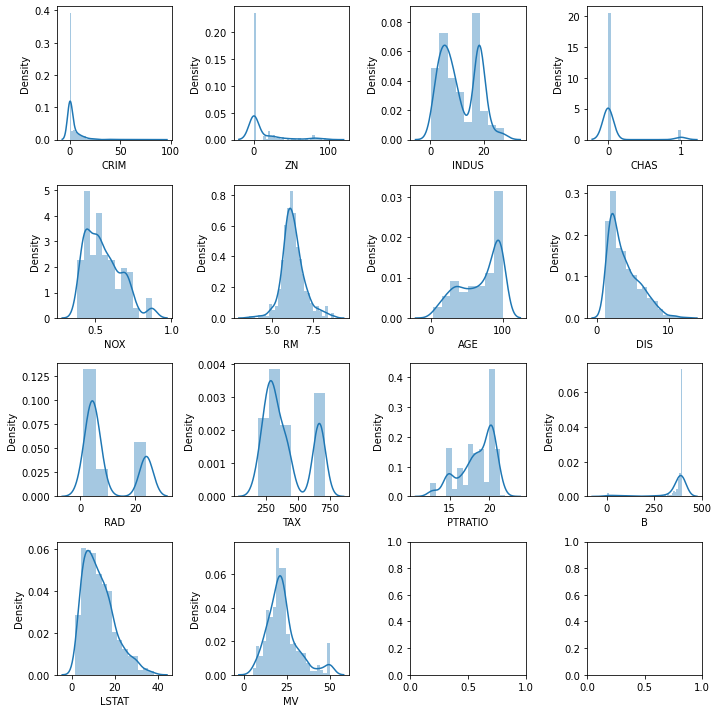

In [4]:
# Summary statistics and distributions
fig, axes = plt.subplots(4, 4, figsize=(10,10), squeeze=False)
for i, col in enumerate(df.columns):
    sns.distplot(df[col], ax=axes.flat[i], axlabel=col)
plt.tight_layout(pad=1.01)
df.describe()

## 2) Identify and account for missing and outlier dataset. 
To do this, create a single function which identifies outliers and creates the outlier dataframe.

In [4]:
def whats_missing(df: pd.DataFrame):
    # Replicate the function from the tutorial
    if df.isnull().values.any(): # check if anything is missing
        print("This input dataframe is missing values")

        # Total missing values for each feature
        print(df.isnull().sum())

        # Total missing values in the whole dataframe
        print(f"Total missing values: {df.isnull().sum().sum()}")

    else: print("No missing values!")

def id_outliers(df: pd.DataFrame, threshold: int = 3):
    # Build a new function for identifying outliers and extracting as a dataframe
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    outlier_locs = np.where(abs_z_scores > threshold)
    outlier_df = pd.DataFrame(index = set(outlier_locs[0]), columns=df.columns)

    for i, row in enumerate(outlier_locs[0]):
        col = outlier_locs[1][i]
        outlier_df.loc[row][col] = df.iloc[row][col]

    return outlier_df

whats_missing(df)

This input dataframe is missing values
CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         1
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      1
MV         0
dtype: int64
Total missing values: 3


Impute the missing data!

In [5]:
df = df.fillna(df.median())
whats_missing(df)

No missing values!


In [6]:
outlier_df = id_outliers(df, 3)
outlier_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
55,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.80,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.92,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.48,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,NaN


### *Question*
* Should you remove any of these outliers? Are there any columns you don't think should have outliers removed?

In [7]:
# Remove identified outliers
# df = df.drop(set(outlier_df.index))
# df

## 3) Identify the highly correlated features


<AxesSubplot:>

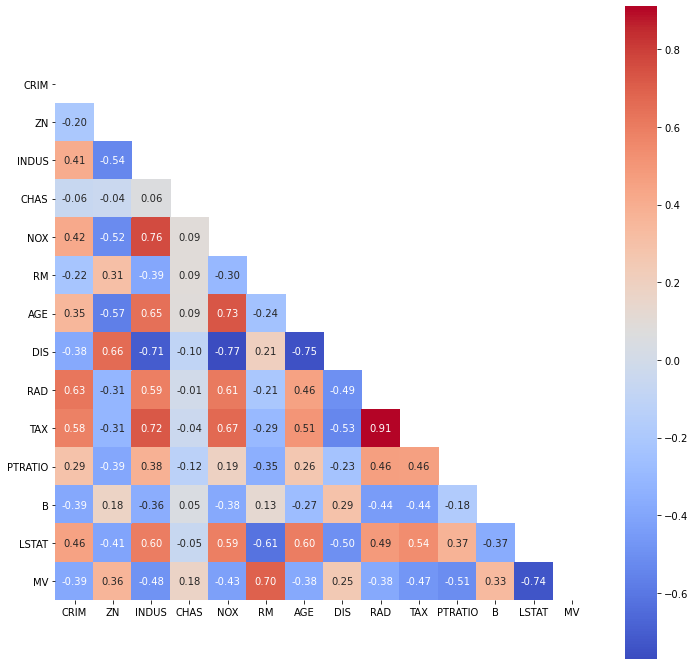

In [8]:
# Use the Seaborn heatmap
matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=ax, mask=matrix)

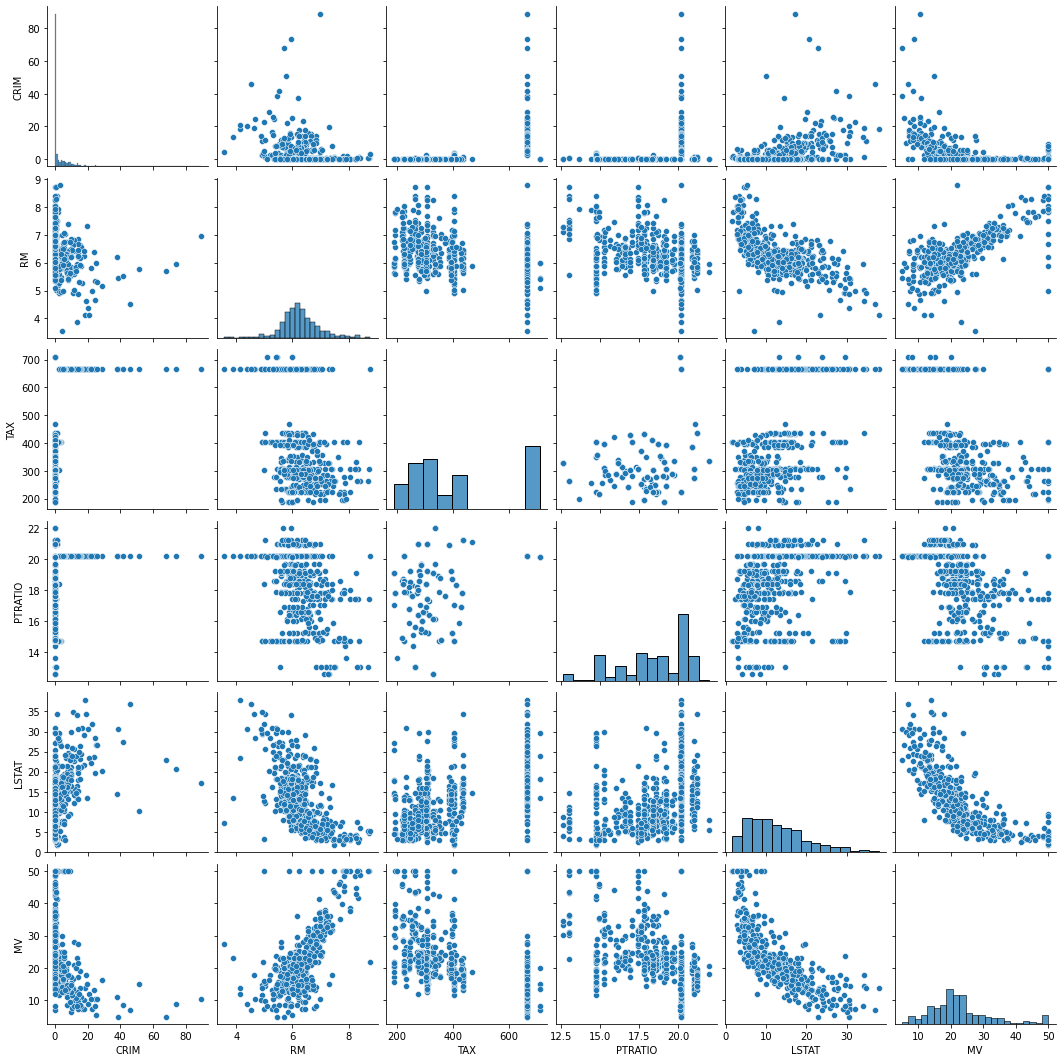

In [15]:
sns.pairplot(df[['CRIM', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MV']])

## 4) Build and evaluate a multiple linear regression model. 

In [9]:
## Step 1: Select input variables to use in regression
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
# We need to add an intercept (beta_0) to our model
X = sm.add_constant(X)

# Choose the output variable
y = df[['MV']]

##Step 2: fit (train) the model
model = sm.OLS(y, X).fit()  # OLS is the Ordinary Least Squares linear model

##print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     262.7
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.76e-121
Time:                        17:55:14   Log-Likelihood:                -1554.2
No. Observations:                 506   AIC:                             3118.
Df Residuals:                     501   BIC:                             3140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3949      3.931      4.680      0.0

Text(0, 0.5, 'MV pred ($1,000)')

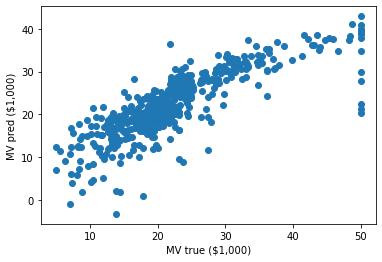

In [10]:
# Step 3: Evaluate the performance of the model

#uses the model to make predictions using the inputs
predictions = model.predict(X)

#plot the model predictions vs true values

##make a scatter plot
ax1 = plt.scatter(y, predictions)

plt.xlabel('MV true ($1,000)')
plt.ylabel('MV pred ($1,000)')

In [11]:
rmse = mean_squared_error(y, predictions, squared=False)  # squared=True gives the MSE, False gives RMSE
adj_r2 = model.rsquared_adj

print("Model performance")
print("-----------------")
print(f"RMSE is {np.round(rmse, 2)}")
print(f"Adjusted R^2 is  {np.round(adj_r2, 2)}")

Model performance
-----------------
RMSE is 5.22
Adjusted R^2 is  0.67


## 5) Build a model which includes all of the features. 

In [25]:
## Step 1: Select input variables to use in regression
X = df.drop(columns=['MV'])
# We need to add an intercept (beta_0) to our model
X = sm.add_constant(X)

# Choose the output variable
y = df[['MV']]

##Step 2: fit (train) the model
model = sm.OLS(y, X).fit()  # OLS is the Ordinary Least Squares linear model

##print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     107.6
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.47e-134
Time:                        18:25:47   Log-Likelihood:                -1499.6
No. Observations:                 506   AIC:                             3027.
Df Residuals:                     492   BIC:                             3086.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2623      5.102      7.107      0.0

In [26]:
rmse = mean_squared_error(y, predictions, squared=False)  # squared=True gives the MSE, False gives RMSE
adj_r2 = model.rsquared_adj

print("Model performance")
print("-----------------")
print(f"RMSE is {np.round(rmse, 2)}")
print(f"Adjusted R^2 is  {np.round(adj_r2, 2)}")

Model performance
-----------------
RMSE is 5.22
Adjusted R^2 is  0.73


## *Questions*
* Does the Adjusted R^2 improve? 

-> Yes

* Is this an acceptable model? Why might you not want to use this model compared to one with fewer input features? Hint: pay attention to the Warnings raised in the model summary. 

-> Warning 2 notes that there may be strong multicollinearity. This indicates that some of the input features are correlated with each other. We don't want to have collinearity within the input features, so we should evaluate and remove features which are highly correlated with each other. This can be done by manually looking at the correlation matrix above, or by calculating the [Variance Inflation Factor (VIF)](https://en.wikipedia.org/wiki/Variance_inflation_factor) of the model.

* What other methods might you use to choose what input features to include?

-> We could calculate the VIF and remove the highest VIF features. We could also remove the features whose coefficients are not significant (p > 0.05) within the model - this is called backward stepwise feature selection when you do it one feature at a time.

### Drop non-significant features

In [29]:
# Drop non-significant features
X_sig = df.drop(columns=['MV', 'INDUS', 'AGE'])
# We need to add an intercept (beta_0) to our model
X_sig = sm.add_constant(X_sig)

# Choose the output variable
y = df[['MV']]

##Step 2: fit (train) the model
model_sig = sm.OLS(y, X_sig).fit()  # OLS is the Ordinary Least Squares linear model

##print the model summary
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.18e-136
Time:                        18:27:22   Log-Likelihood:                -1499.6
No. Observations:                 506   AIC:                             3023.
Df Residuals:                     494   BIC:                             3074.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2156      5.068      7.146      0.0

### Removing collinear features through VIF

When using VIF to handle collinearity, we should set a threshold of acceptable VIF. Typically this is <5, but we can set it lower to be more cautious.

In [30]:
# calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

const      583.081769
CRIM         1.791793
ZN           2.303232
INDUS        4.001669
CHAS         1.073803
NOX          4.388577
RM           1.928928
AGE          3.085842
DIS          3.959033
RAD          7.488191
TAX          9.016988
PTRATIO      1.798416
B            1.348376
LSTAT        2.912888
dtype: float64

In [34]:
X_vif = X.drop(columns=['TAX'])
y = df[['MV']]
model_sig = sm.OLS(y, X_vif).fit()

print(model_sig.summary())
print(pd.Series([vif(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns))

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          2.52e-133
Time:                        18:30:12   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4428      5.121      6.726      0.0

In [35]:
X_vif = X_vif.drop(columns=['NOX'])
y = df[['MV']]
model_sig = sm.OLS(y, X_vif).fit()

print(model_sig.summary())
print(pd.Series([vif(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns))

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.87e-129
Time:                        18:31:39   Log-Likelihood:                -1516.7
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     494   BIC:                             3108.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6380      4.345      4.750      0.0

In [36]:
X_vif = X_vif.drop(columns=['DIS'])
y = df[['MV']]
model_sig = sm.OLS(y, X_vif).fit()

print(model_sig.summary())
print(pd.Series([vif(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns))

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          2.21e-122
Time:                        18:32:01   Log-Likelihood:                -1536.0
No. Observations:                 506   AIC:                             3094.
Df Residuals:                     495   BIC:                             3141.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5450      4.352      3.112      0.0

And so on until we don't have Warnings, or until we feel we've removed any collinearity problems. 